[0 1 2]


([<matplotlib.axis.XTick at 0x13f9e67b898>,
 <a list of 3 Text xticklabel objects>)

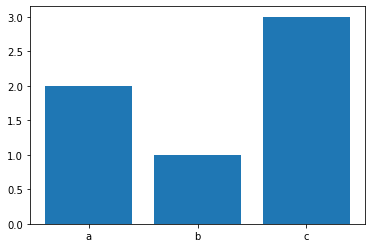

In [18]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x = np.arange(3)
print(x)
plt.bar([1,0,2], height= [1,2,3])
plt.xticks(x, ['a','b','c'])

In [12]:
import pickle
class C(object):
    def __init__(self, i):
        self.i = i
    def __getstate__(self):
        return {'i': self.i}
assert pickle.loads(pickle.dumps(C(1), -1)).i == 1
pickle.loads(pickle.dumps(C(1), -1)).i

1

In [21]:
import os.path as osp

import torch
import torch.nn.functional as F
from torch_geometric.datasets import Planetoid
import torch_geometric.transforms as T
from torch_geometric.nn import GATConv

dataset = 'Cora'

path = osp.join(osp.dirname(osp.realpath('data/cora/raw')), '..', 'data', dataset)
dataset = Planetoid(path, dataset, T.NormalizeFeatures())
data = dataset[0]


class Net(torch.nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = GATConv(dataset.num_features, 8, heads=8, dropout=0.6)
        # On the Pubmed dataset, use heads=8 in conv2.
        self.conv2 = GATConv(
            8 * 8, dataset.num_classes, heads=1, concat=True, dropout=0.6)

    def forward(self):
        # how come there is no need for average before last non-linear layer?? 
        x = F.dropout(data.x, p=0.6, training=self.training)
        x = F.elu(self.conv1(x, data.edge_index))
        x = F.dropout(x, p=0.6, training=self.training)
        x = self.conv2(x, data.edge_index)
        return F.log_softmax(x, dim=1)


device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model, data = Net().to(device), data.to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.005, weight_decay=5e-4)


def train():
    model.train()
    optimizer.zero_grad()
    F.nll_loss(model()[data.train_mask], data.y[data.train_mask]).backward()
    optimizer.step()


def test():
    model.eval()
    logits, accs = model(), []
    for _, mask in data('train_mask', 'val_mask', 'test_mask'):
        pred = logits[mask].max(1)[1]
        acc = pred.eq(data.y[mask]).sum().item() / mask.sum().item()
        accs.append(acc)
    return accs


for epoch in range(1, 201):
    train()
    log = 'Epoch: {:03d}, Train: {:.4f}, Val: {:.4f}, Test: {:.4f}'
    print(log.format(epoch, *test()))

Processing...
Done!
Epoch: 001, Train: 0.2429, Val: 0.2240, Test: 0.2010
Epoch: 002, Train: 0.5643, Val: 0.3680, Test: 0.3450
Epoch: 003, Train: 0.6429, Val: 0.4400, Test: 0.4430
Epoch: 004, Train: 0.6071, Val: 0.4000, Test: 0.3930
Epoch: 005, Train: 0.6143, Val: 0.3740, Test: 0.3740
Epoch: 006, Train: 0.6714, Val: 0.4280, Test: 0.4170
Epoch: 007, Train: 0.7071, Val: 0.4520, Test: 0.4250
Epoch: 008, Train: 0.7000, Val: 0.4340, Test: 0.4290
Epoch: 009, Train: 0.6643, Val: 0.4220, Test: 0.4270
Epoch: 010, Train: 0.6929, Val: 0.4440, Test: 0.4380
Epoch: 011, Train: 0.7071, Val: 0.4460, Test: 0.4340
Epoch: 012, Train: 0.7429, Val: 0.4560, Test: 0.4420
Epoch: 013, Train: 0.7929, Val: 0.4960, Test: 0.4850
Epoch: 014, Train: 0.7929, Val: 0.5080, Test: 0.5030
Epoch: 015, Train: 0.8286, Val: 0.5360, Test: 0.5390
Epoch: 016, Train: 0.8500, Val: 0.5800, Test: 0.5850
Epoch: 017, Train: 0.8857, Val: 0.6380, Test: 0.6360
Epoch: 018, Train: 0.8929, Val: 0.6760, Test: 0.6810
Epoch: 019, Train: 0.8929,

In [23]:
import os.path as osp

import torch
import torch.nn.functional as F
from torch_geometric.datasets import Planetoid
import torch_geometric.transforms as T
from torch_geometric.nn import GATConv

dataset = 'Cora'

path = osp.join(osp.dirname(osp.realpath('data/data/Cora')), '..', 'data', dataset)
dataset = Planetoid(path, dataset, T.NormalizeFeatures())
data = dataset[0]


class Net(torch.nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = GATConv(dataset.num_features, 8, heads=8, dropout=0.6)
        # On the Pubmed dataset, use heads=8 in conv2.
        self.conv2 = GATConv(
            8 * 8, dataset.num_classes, heads=1, concat=True, dropout=0.6)

    def forward(self):
        # how come there is no need for average before last non-linear layer?? 
        x = F.dropout(data.x, p=0.6, training=self.training)
        x = F.elu(self.conv1(x, data.edge_index))
        x = F.dropout(x, p=0.6, training=self.training)
        x = 1/8 * self.conv2(x, data.edge_index)
        return F.log_softmax(x, dim=1)


device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model, data = Net().to(device), data.to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.005, weight_decay=5e-4)


def train():
    model.train()
    optimizer.zero_grad()
    F.nll_loss(model()[data.train_mask], data.y[data.train_mask]).backward()
    optimizer.step()


def test():
    model.eval()
    logits, accs = model(), []
    for _, mask in data('train_mask', 'val_mask', 'test_mask'):
        pred = logits[mask].max(1)[1]
        acc = pred.eq(data.y[mask]).sum().item() / mask.sum().item()
        accs.append(acc)
    return accs


for epoch in range(1, 201):
    train()
    log = 'Epoch: {:03d}, Train: {:.4f}, Val: {:.4f}, Test: {:.4f}'
    print(log.format(epoch, *test()))

Epoch: 001, Train: 0.1500, Val: 0.1140, Test: 0.1100
Epoch: 002, Train: 0.2143, Val: 0.1320, Test: 0.1390
Epoch: 003, Train: 0.3143, Val: 0.1860, Test: 0.2000
Epoch: 004, Train: 0.3571, Val: 0.2140, Test: 0.2290
Epoch: 005, Train: 0.4571, Val: 0.2640, Test: 0.2920
Epoch: 006, Train: 0.4714, Val: 0.3080, Test: 0.3320
Epoch: 007, Train: 0.5571, Val: 0.3340, Test: 0.3670
Epoch: 008, Train: 0.6929, Val: 0.4560, Test: 0.4600
Epoch: 009, Train: 0.8071, Val: 0.6520, Test: 0.6800
Epoch: 010, Train: 0.8286, Val: 0.6860, Test: 0.7120
Epoch: 011, Train: 0.8071, Val: 0.6760, Test: 0.6970
Epoch: 012, Train: 0.7714, Val: 0.6580, Test: 0.6750
Epoch: 013, Train: 0.7714, Val: 0.6540, Test: 0.6720
Epoch: 014, Train: 0.7500, Val: 0.6620, Test: 0.6830
Epoch: 015, Train: 0.7500, Val: 0.6820, Test: 0.6910
Epoch: 016, Train: 0.8000, Val: 0.7080, Test: 0.7160
Epoch: 017, Train: 0.8357, Val: 0.7260, Test: 0.7280
Epoch: 018, Train: 0.8429, Val: 0.7260, Test: 0.7370
Epoch: 019, Train: 0.8500, Val: 0.7140, Test: 

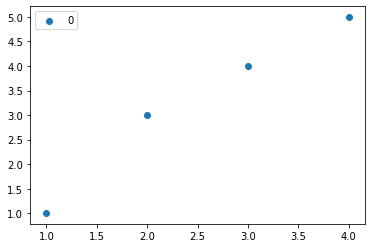

In [7]:
import matplotlib.pyplot as plt
x = [1,2,3,4]
y = [1,3,4,5]
label = [0,1,1,0]
# plt.scatter(x,y,label=label)
plt.scatter(x,y)
plt.legend(label)
plt.show()


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


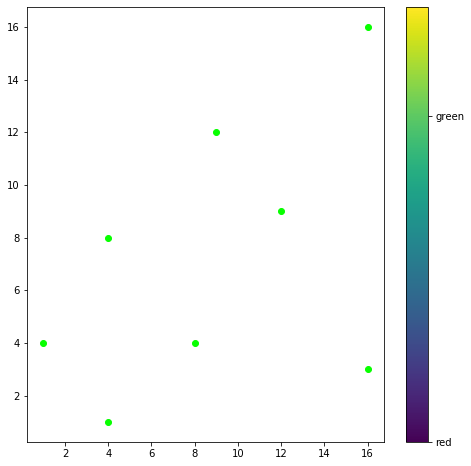

In [26]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

x = [4,8,12,16,1,4,9,16]
y = [1,4,9,16,4,8,12,3]
label = [0,1,2,3,0,1,2,3]
colors = ['red','green','blue','purple']


fig = plt.figure(figsize=(8,8))
# plt.cm.get_cmap('hsv', 10, )
plt.scatter(x, y,  c=label, cmap=matplotlib.colors.ListedColormap())
# plt.scatter(x, y, c=label, cmap=matplotlib.colors.ListedColormap(colors))

cb = plt.colorbar()
loc = np.arange(0,max(label),max(label)/float(len(colors)))
cb.set_ticks(loc)
cb.set_ticklabels(colors)

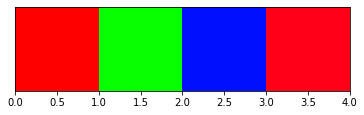

In [17]:
import matplotlib.pyplot as plt

def get_cmap(n, name='hsv'):
    '''Returns a function that maps each index in 0, 1, ..., n-1 to a distinct 
    RGB color; the keyword argument name must be a standard mpl colormap name.'''
    return plt.cm.get_cmap(name, n)

def main():
    N = 4
    fig=plt.figure()
    ax=fig.add_subplot(111)   
    plt.axis('scaled')
    ax.set_xlim([ 0, N])
    ax.set_ylim([-0.5, 0.5])
    cmap = get_cmap(N)
    for i in range(N):
        rect = plt.Rectangle((i, -0.5), 1, 1, facecolor=cmap(i))
        ax.add_artist(rect)
    ax.set_yticks([])
    plt.show()

if __name__=='__main__':
    main()

In [28]:
if False:
    print("if")
elif True:
    print("elif")
else:
    print("else")

elif


In [118]:
import torch
import torch.nn.functional as F
import numpy as np
# input = torch.randn(3, 5, requires_grad=True)
x = np.array([[100000,  100,  1.9125, -0.8701, -1.4935],
        [100,  100000, -1.9865,  1.9137,  0.5035],
        [ 1.1986, -1.1636, 100000, 10, -0.5981]])
x = torch.tensor(x)
# each element in target has to have 0 <= value < C
target = torch.tensor([1, 0, 4])
# output = F.nll_loss(F.log_softmax(input), target)
output = F.nll_loss(x, target)
# output.backward()
print(input)
print(F.log_softmax(input))
print(output)

tensor([[-0.6258, -0.9976, -1.0214, -0.3826,  0.9424],
        [ 0.4172,  0.8993, -0.7114,  1.5132, -0.4366],
        [-1.1204,  0.5191,  1.2481,  0.6030, -0.2336]], requires_grad=True)


C:\Users\awannaphasch2016\AppData\Local\Continuum\anaconda3\envs\pytorch_python3.7\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  from ipykernel import kernelapp as app


tensor([[-2.1325, -2.5043, -2.5281, -1.8893, -0.5643],
        [-1.8501, -1.3681, -2.9788, -0.7542, -2.7040],
        [-3.2134, -1.5740, -0.8450, -1.4900, -2.3266]],
       grad_fn=<LogSoftmaxBackward>)
tensor(-66.4673, dtype=torch.float64)


In [104]:
import torch
import torch.nn.functional as F
import numpy as np
input = torch.randn(3, 5, requires_grad=True)
x = np.array([[0,  100,  100000, -0.8701, -1.4935],
        [100,  10000, -1.9865,  1.9137,  0.5035],
        [ 1.1986, -1.1636, 0, 10000, 100]])
x = torch.tensor(x)
# each element in target has to have 0 <= value < C
target = torch.tensor([1, 0, 4])
# output = F.nll_loss(F.log_softmax(input), target)
output = F.nll_loss(x, target)
# output.backward()
print(input)
# print(F.log_softmax(input))
print(output)

tensor([[-0.0163,  0.2736, -0.7971, -0.8804, -1.9788],
        [-1.1030,  0.2063, -1.6021,  1.8479, -1.1519],
        [ 1.4482,  0.9897, -0.5516, -0.9631,  2.0321]], requires_grad=True)
tensor(-100., dtype=torch.float64)


In [113]:
import torch
import torch.nn.functional as F
import numpy as np
# input = torch.randn(3, 5, requires_grad=True)
x = np.array([[0,  100,  0, -0.8701, -1.4935],
        [100,  0, -1.9865,  1.9137,  0.5035],
        [ 1.1986, -1.1636, 0, 0, 100]])
x = torch.tensor(x)
# each element in target has to have 0 <= value < C
target = torch.tensor([1, 0, 4])
# output = F.nll_loss(F.log_softmax(input), target)
output = F.nll_loss(x, target)
# output.backward()
# print(input)
# print(F.log_softmax(input))
print(output)

tensor(-100., dtype=torch.float64)


In [139]:
import torch
import torch.nn.functional as F
import numpy as np
# x = torch.randn(3, 5, requires_grad=True)
x = np.array([[0,  100,  0, 0.5, 5],
        [100,  0, -1.4,  13,  0.545],
        [ 1.1986, 0, 0, 0, 100]])
x = torch.tensor(x)
# each element in target has to have 0 <= value < C
target = torch.tensor([1, 0, 4])
# output = F.nll_loss(F.log_softmax(input), target)
output = F.nll_loss(x, target)
# output.backward()
# print(input)
# print(F.log_softmax(input))
print(output)

tensor(-100., dtype=torch.float64)


One_hot_vector

In [2]:
from sklearn.preprocessing import OneHotEncoder

In [3]:
enc = OneHotEncoder(handle_unknown='ignore')
X = [['Male', 1], ['Female', 3], ['Female', 2]]
enc.fit(X)


OneHotEncoder(categorical_features=None, categories=None, drop=None,
              dtype=<class 'numpy.float64'>, handle_unknown='ignore',
              n_values=None, sparse=True)

In [4]:
enc.categories_

[array(['Female', 'Male'], dtype=object), array([1, 2, 3], dtype=object)]

In [8]:
enc.transform([['Female', 1], ['Male', 5], ['no',3]]).toarray()

array([[1., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.]])

In [16]:
enc.inverse_transform([[0, 1, 1, 0, 0], [0, 0, 0, 0, 0]])

array([['Male', 1],
       [None, None]], dtype=object)

In [22]:
import networkx as nx 
edges = [(2,999),(3,3), (6,777), (4,666)]
G = nx.Graph()
G.add_edges_from(edges)
# print(G.edges)
print(G.edges)
print(nx.adjacency_matrix(G).todense())

[(2, 999), (3, 3), (6, 777), (4, 666)]
[[0 1 0 0 0 0 0]
 [1 0 0 0 0 0 0]
 [0 0 1 0 0 0 0]
 [0 0 0 0 1 0 0]
 [0 0 0 1 0 0 0]
 [0 0 0 0 0 0 1]
 [0 0 0 0 0 1 0]]


In [27]:
import numpy

def weighted_adjmatrix(adjlist, nodes):
    '''Returns a (weighted) adjacency matrix as a NumPy array.'''
    matrix = []
    for node in nodes:
        weights = {endnode:int(weight)
                   for w in adjlist.get(node, {})
                   for endnode, weight in w.items()}
        matrix.append([weights.get(endnode, 0) for endnode in nodes])
    matrix = numpy.array(matrix)
    return matrix + matrix.transpose()

graph = {'1': [{'2':'1'}, {'4':'7'}, {'5':'10'}],
    '2': [{'3':'9'}, {'4':'11'}, {'6':'9'}],
    '3': [{'5':'12'}, {'6':'7'}],
    '4': [{'5':'8'}, {'6':'14'}],
    '5': [{'6':'8'}]}
x = weighted_adjmatrix(graph, nodes=list('123456'))
print(x)

[[ 0  1  0  7 10  0]
 [ 1  0  9 11  0  9]
 [ 0  9  0  0 12  7]
 [ 7 11  0  0  8 14]
 [10  0 12  8  0  8]
 [ 0  9  7 14  8  0]]


In [32]:
import numpy as np
x1 = np.arange(9.0).reshape((3, 3))
x2 = np.arange(3.0)
# np.add(x1,x2)
print(x2)
print(x1)

[0. 1. 2.]
[[0. 1. 2.]
 [3. 4. 5.]
 [6. 7. 8.]]


In [38]:
x = 0
y = np.arange(3)
x = np.add(x,y)
print(x)

[0 1 2]


In [40]:
1 + y

array([1, 2, 3])

Sparse matrix with scipy.sparse

In [46]:
from scipy import sparse as sp
from scipy.stats import uniform
import numpy as np 

In [43]:
row_ind = np.array([0,1,1,3,4])
col_ind = np.array([0,2,4,3,4])
data = np.array([1,2,3,4,5], dtype=float)

In [47]:
row_ind = np.array([0,1,1,3,4])
col_ind = np.array([0,2,4,3,4])
data = np.array([1,2,3,4,5], dtype=float)
mat_coo = sp.coo_matrix((data, (row_ind, col_ind)))
print(mat_coo)

  (0, 0)	1.0
  (1, 2)	2.0
  (1, 4)	3.0
  (3, 3)	4.0
  (4, 4)	5.0


In [48]:
np.random.seed(seed=42)
data = uniform.rvs(size=16, loc=0, scale=2)
data = np.reshape(data, (4,4))
data

array([[0.74908024, 1.90142861, 1.46398788, 1.19731697],
       [0.31203728, 0.31198904, 0.11616722, 1.73235229],
       [1.20223002, 1.41614516, 0.04116899, 1.9398197 ],
       [1.66488528, 0.42467822, 0.36364993, 0.36680902]])

In [51]:
data[data < 1] = 0
data

array([[0.        , 1.90142861, 1.46398788, 1.19731697],
       [0.        , 0.        , 0.        , 1.73235229],
       [1.20223002, 1.41614516, 0.        , 1.9398197 ],
       [1.66488528, 0.        , 0.        , 0.        ]])

In [52]:
data_csr = sp.csr_matrix(data)

In [56]:
data_size = data.nbytes
print(data_size)

128


In [57]:
data_csr = sp.csr_matrix(data)
data_csr_size = data_csr.data.size/(1024**2)
print(data_csr_size)

8


In [64]:
row_ind = np.array([0,1,1,3,4])
col_ind = np.array([0,2,4,3,4])
data = np.array([1,2,3,4,5], dtype=float)
mat_coo = sp.coo_matrix((data, (row_ind, col_ind)))
print(mat_coo)

  (0, 0)	1.0
  (1, 2)	2.0
  (1, 4)	3.0
  (3, 3)	4.0
  (4, 4)	5.0


In [78]:
x = mat_coo.max(axis=1) # max value for each rows
y = mat_coo.max(axis=0) # max value for each cols
print(x)
print("===")
print(y)

  (0, 0)	1.0
  (1, 0)	3.0
  (3, 0)	4.0
  (4, 0)	5.0
===
  (0, 0)	1.0
  (0, 2)	2.0
  (0, 3)	4.0
  (0, 4)	5.0


In [76]:
mat_coo.todense()

matrix([[1., 0., 0., 0., 0.],
        [0., 0., 2., 0., 3.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 4., 0.],
        [0., 0., 0., 0., 5.]])

In [79]:
x.todense()

matrix([[1.],
        [3.],
        [0.],
        [4.],
        [5.]])

In [80]:
y.todense()

matrix([[1., 0., 2., 4., 5.]])

In [90]:
x = sp.hstack([mat_coo, mat_coo])
print(x.todense())
x = sp.vstack([mat_coo, mat_coo])
print("===")
print(x.todense())
print('===')
print(x.transpose().todense())

[[1. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 2. 0. 3. 0. 0. 2. 0. 3.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 4. 0. 0. 0. 0. 4. 0.]
 [0. 0. 0. 0. 5. 0. 0. 0. 0. 5.]]
===
[[1. 0. 0. 0. 0.]
 [0. 0. 2. 0. 3.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 4. 0.]
 [0. 0. 0. 0. 5.]
 [1. 0. 0. 0. 0.]
 [0. 0. 2. 0. 3.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 4. 0.]
 [0. 0. 0. 0. 5.]]
===
[[1. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 2. 0. 0. 0. 0. 2. 0. 0. 0.]
 [0. 0. 0. 4. 0. 0. 0. 0. 4. 0.]
 [0. 3. 0. 0. 5. 0. 3. 0. 0. 5.]]


In [112]:
identity_mx = sp.eye(5).tocoo()
print(identity_mx.tocoo())

  (0, 0)	1.0
  (1, 1)	1.0
  (2, 2)	1.0
  (3, 3)	1.0
  (4, 4)	1.0


In [113]:
print(identity_mx.row)
print(identity_mx.col)
print(identity_mx.data)

[0 1 2 3 4]
[0 1 2 3 4]
[1. 1. 1. 1. 1.]


In [115]:
np.ones(3)

array([1., 1., 1.])

In [95]:
row_ind = np.array([0,1,1,3,4])
col_ind = np.array([0,2,4,3,4])
data = np.array([1,2,3,4], dtype=float)
mat_coo = sp.coo_matrix((data, (row_ind, col_ind)))
print(mat_coo)

ValueError: row, column, and data array must all be the same length

In [98]:
np.zeros(3 * 3 ).reshape(3,-1)

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [99]:
np.identity(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [104]:
from torch_geometric.datasets import Planetoid

dataset = Planetoid(root='/tmp/Cora', name='Cora')
import torch
import torch.nn.functional as F
from torch_geometric.nn import GCNConv

class Net(torch.nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = GCNConv(dataset.num_features, 16)
        self.conv2 = GCNConv(16, dataset.num_classes)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        print(x.shape)
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, training=self.training)
        x = self.conv2(x, edge_index)

        return F.log_softmax(x, dim=1)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = Net().to(device)
data = dataset[0].to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)

model.train()
for epoch in range(200):
    optimizer.zero_grad()
    out = model(data)
    loss = F.nll_loss(out[data.train_mask], data.y[data.train_mask])
    loss.backward()
    optimizer.step()

model.eval()
_, pred = model(data).max(dim=1)
correct = float (pred[data.test_mask].eq(data.y[data.test_mask]).sum().item())
acc = correct / data.test_mask.sum().item()
print('Accuracy: {:.4f}'.format(acc))

torch.Size([2708, 1433])
torch.Size([2708, 1433])
torch.Size([2708, 1433])
torch.Size([2708, 1433])
torch.Size([2708, 1433])
torch.Size([2708, 1433])
torch.Size([2708, 1433])
torch.Size([2708, 1433])
torch.Size([2708, 1433])
torch.Size([2708, 1433])
torch.Size([2708, 1433])
torch.Size([2708, 1433])
torch.Size([2708, 1433])
torch.Size([2708, 1433])
torch.Size([2708, 1433])
torch.Size([2708, 1433])
torch.Size([2708, 1433])
torch.Size([2708, 1433])
torch.Size([2708, 1433])
torch.Size([2708, 1433])
torch.Size([2708, 1433])
torch.Size([2708, 1433])
torch.Size([2708, 1433])
torch.Size([2708, 1433])
torch.Size([2708, 1433])
torch.Size([2708, 1433])
torch.Size([2708, 1433])
torch.Size([2708, 1433])
torch.Size([2708, 1433])
torch.Size([2708, 1433])
torch.Size([2708, 1433])
torch.Size([2708, 1433])
torch.Size([2708, 1433])
torch.Size([2708, 1433])
torch.Size([2708, 1433])
torch.Size([2708, 1433])
torch.Size([2708, 1433])
torch.Size([2708, 1433])
torch.Size([2708, 1433])
torch.Size([2708, 1433])


In [118]:
class DoppelDict(dict):
    def __setitem__(self, key,value):
            super().__setitem__(key, [value]*2)
dd =DoppelDict(one=1)
dd

{'one': 1}

In [119]:
dd['two'] =2

In [120]:
dd

{'one': 1, 'two': [2, 2]}

In [122]:
dd.update(three=3)

In [123]:
dd

{'one': 1, 'two': [2, 2], 'three': 3}

In [125]:
class AnswerDict(dict):
    def __getitem__(self, key):
        return 42
    
ad = AnswerDict(a='foo')
ad['a']

42

In [126]:
d = {}

In [127]:
d.update(ad)

In [128]:
d

{'a': 'foo'}

In [130]:
import collections 
class DoppelDict2(collections.UserDict):
    def __setitem__(self, key, value):
        super().__setitem__(key, [value] *2)
dd = DoppelDict2(one=1)
dd

{'one': [1, 1]}

In [131]:
dd['two'] = 2

In [ ]:
__init__, get, update dro mdict refused to copperate 
with overriden __missing__, c__contains__ , and _-setitem__.

In [ ]:
class StrKeyDict(dict):
    def __init__(self, iteable=None, **kwds):
        super().__init__()
        self.update(iteable, **kwds)
    def __missing__(self):
        if isinstance(key, str):
            raise KeyError(key)
        return self[str(key)]
    def __contains(self,key):
        return key in self.keys() or str(key) in self.keys()
    def __setitem__(self,key,item):
        super().__setitem__(str(key),item)
    def get(self, key, default=None):
        try:
            return self[key]
        except:
            return default # try using raise KeyError
    def update(self, iterable=None, **kwds):
        if iterable is not None:
            if isinstnace(iterable, collections.abc.Mapping):
                pairs= iterable.items()
            else:
                pairs((k,v) for k,v in iterable)
            for key, value in pairs:
                self[key] = value
        if kwds:
            self.update(kwds)
        

In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [5]:
X, y = make_classification(n_samples=1000, n_features=4,
                           n_informative=2, n_redundant=0,
                           random_state=0, shuffle=False)
clf = RandomForestClassifier(n_estimators=100, max_depth=2,
                             random_state=0)
clf.fit(X, y)  






print(clf.feature_importances_)

print(clf.predict([[0, 0, 0, 0]]))
# print(clf.predict([[0, 0]]))

[0.14205973 0.76664038 0.0282433  0.06305659]
[1]


In [6]:
import pandas as pd
import numpy as np
from scipy import interp

from  sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelBinarizer

def class_report(y_true, y_pred, y_score=None, average='micro'):
    if y_true.shape != y_pred.shape:
        print("Error! y_true %s is not the same shape as y_pred %s" % (
              y_true.shape,
              y_pred.shape)
        )
        return

    lb = LabelBinarizer()

    if len(y_true.shape) == 1:
        lb.fit(y_true)

    #Value counts of predictions
    labels, cnt = np.unique(
        y_pred,
        return_counts=True)
    n_classes = len(labels)
    pred_cnt = pd.Series(cnt, index=labels)

    metrics_summary = precision_recall_fscore_support(
            y_true=y_true,
            y_pred=y_pred,
            labels=labels)

    avg = list(precision_recall_fscore_support(
            y_true=y_true, 
            y_pred=y_pred,
            average='weighted'))

    metrics_sum_index = ['precision', 'recall', 'f1-score', 'support']
    class_report_df = pd.DataFrame(
        list(metrics_summary),
        index=metrics_sum_index,
        columns=labels)

    support = class_report_df.loc['support']
    total = support.sum() 
    class_report_df['avg / total'] = avg[:-1] + [total]

    class_report_df = class_report_df.T
    class_report_df['pred'] = pred_cnt
    class_report_df['pred'].iloc[-1] = total

    if not (y_score is None):
        fpr = dict()
        tpr = dict()
        roc_auc = dict()
        for label_it, label in enumerate(labels):
            fpr[label], tpr[label], _ = roc_curve(
                (y_true == label).astype(int), 
                y_score[:, label_it])

            roc_auc[label] = auc(fpr[label], tpr[label])

        if average == 'micro':
            if n_classes <= 2:
                fpr["avg / total"], tpr["avg / total"], _ = roc_curve(
                    lb.transform(y_true).ravel(), 
                    y_score[:, 1].ravel())
            else:
                fpr["avg / total"], tpr["avg / total"], _ = roc_curve(
                        lb.transform(y_true).ravel(), 
                        y_score.ravel())

            roc_auc["avg / total"] = auc(
                fpr["avg / total"], 
                tpr["avg / total"])

        elif average == 'macro':
            # First aggregate all false positive rates
            all_fpr = np.unique(np.concatenate([
                fpr[i] for i in labels]
            ))

            # Then interpolate all ROC curves at this points
            mean_tpr = np.zeros_like(all_fpr)
            for i in labels:
                mean_tpr += interp(all_fpr, fpr[i], tpr[i])

            # Finally average it and compute AUC
            mean_tpr /= n_classes

            fpr["macro"] = all_fpr
            tpr["macro"] = mean_tpr

            roc_auc["avg / total"] = auc(fpr["macro"], tpr["macro"])

        class_report_df['AUC'] = pd.Series(roc_auc)

    return class_report_df

In [7]:
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=5000, n_features=10,
                           n_informative=5, n_redundant=0,
                           n_classes=10, random_state=0, 
                           shuffle=False)

X_train, X_test, y_train, y_test = train_test_split(X, y)

model = RandomForestClassifier(max_depth=2, random_state=0)
model.fit(X_train, y_train)

C:\Users\awannaphasch2016\AppData\Local\Continuum\anaconda3\envs\pytorch_python3.7\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=2, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [8]:
sk_report = classification_report(
    digits=6,
    y_true=y_test, 
    y_pred=model.predict(X_test))
print(sk_report)

              precision    recall  f1-score   support

           0   0.274336  0.678832  0.390756       137
           1   0.270270  0.166667  0.206186       120
           2   0.442623  0.223140  0.296703       121
           3   0.363636  0.310345  0.334884       116
           4   0.376147  0.299270  0.333333       137
           5   0.727273  0.067797  0.124031       118
           6   0.437956  0.400000  0.418118       150
           7   0.450000  0.225000  0.300000       120
           8   0.222222  0.378378  0.280000       111
           9   0.298246  0.425000  0.350515       120

    accuracy                       0.324000      1250
   macro avg   0.386271  0.317443  0.303453      1250
weighted avg   0.386604  0.324000  0.308148      1250



In [9]:
report_with_auc = class_report(
    y_true=y_test, 
    y_pred=model.predict(X_test), 
    y_score=model.predict_proba(X_test))

print(report_with_auc)

             precision    recall  f1-score  support    pred       AUC
0             0.274336  0.678832  0.390756    137.0   339.0  0.780651
1             0.270270  0.166667  0.206186    120.0    74.0  0.761409
2             0.442623  0.223140  0.296703    121.0    61.0  0.791068
3             0.363636  0.310345  0.334884    116.0    99.0  0.840475
4             0.376147  0.299270  0.333333    137.0   109.0  0.774778
5             0.727273  0.067797  0.124031    118.0    11.0  0.676386
6             0.437956  0.400000  0.418118    150.0   137.0  0.842139
7             0.450000  0.225000  0.300000    120.0    60.0  0.790302
8             0.222222  0.378378  0.280000    111.0   189.0  0.779354
9             0.298246  0.425000  0.350515    120.0   171.0  0.796010
avg / total   0.386604  0.324000  0.308148   1250.0  1250.0  0.783347


In [14]:
import matplotlib.pyplot as plt
% matplotlib inline
# First create some toy data:
x = np.linspace(0, 2*np.pi, 400)
y = np.sin(x**2)

# Creates just a figure and only one subplot
fig, ax = plt.subplots()
ax.plot(x, y)
ax.set_title('Simple plot')

# Creates two subplots and unpacks the output array immediately
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.plot(x, y)
ax1.set_title('Sharing Y axis')
ax2.scatter(x, y)

# Creates four polar axes, and accesses them through the returned array
fig, axes = plt.subplots(2, 2, subplot_kw=dict(polar=True))
axes[0, 0].plot(x, y)
axes[1, 1].scatter(x, y)

# Share a X axis with each column of subplots
plt.subplots(2, 2, sharex='col')

# Share a Y axis with each row of subplots
plt.subplots(2, 2, sharey='row')

# Share both X and Y axes with all subplots
plt.subplots(2, 2, sharex='all', sharey='all')

# Note that this is the same as
plt.subplots(2, 2, sharex=True, sharey=True)

# Creates figure number 10 with a single subplot
# and clears it if it already exists.
fig, ax=plt.subplots(num=10, clear=True)

UsageError: Line magic function `%` not found.


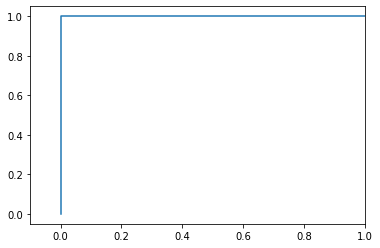

In [25]:
fig, axes = plt.subplots(1,1)
axes.plot([0.        , 0.        , 0.12068966, 1.        ], [0., 1., 1., 1.])
# axes.plot([0.12068966, 1.        ], [1., 1.])
axes.set_xlim(-0.1,1)
plt.show()